<a href="https://colab.research.google.com/github/BaileyEWiffen/Facial-Emotion-Recognition/blob/main/test_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Needs to be run for the rest of the code to function

In [ ]:
!pip install opencv-python==4.5.5.64
!pip show opencv-python
!pip install imbalanced-learn
import imblearn
import cv2
from sklearn.model_selection import train_test_split
from skimage import img_as_ubyte, io, color
from sklearn.cluster import MiniBatchKMeans
from sklearn import svm, metrics
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from skimage.feature import hog
from skimage import data, exposure
import matplotlib.pyplot as plt

%matplotlib inline
#Adapted from IN3060/INM460 Lab 2
from google.colab import drive
drive.mount('/content/drive')
import os

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks/CW_Folder_UG' 
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

#Adapted from IN3060/INM460 Lab 7
zip_path = os.path.join(GOOGLE_DRIVE_PATH, 'CW_Dataset/CW_Dataset.zip')
!cp '{zip_path}' .
!yes|unzip -q CW_Dataset.zip
!rm CW_Dataset.zip

#Adapted from IN3060/INM460 Lab 6
%load_ext autoreload
%autoreload 2
import sys
CODE_PATH = os.path.join(GOOGLE_DRIVE_PATH, 'Code')
sys.path.append(CODE_PATH)

     |████████████████████████████████| 60.5 MB 1.2 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
Name: opencv-python
Version: 4.5.5.64
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/skvark/opencv-python
Author: None
Author-email: None
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy
Required-by: imgaug, dopamine-rl, albumentations
Mounted at /content/drive
['Code', 'Models', 'Personal_Dataset', 'CW_Dataset', 'test_functions.ipynb']


Emotion Recognition Function:

'CW_Dataset' - path to CW Dataset

'Personal_Dataset' - path to personal Dataset

model types:

'HS' - HOG SVM

'SS' - SIFT SVM

'HM1' - HOG MLP (2000,1000) hidden layers

'HM2' - HOG MLP (5000,3000) hidden layers

In [ ]:
from joblib import dump, load
from matplotlib import patches
from util import import_x_data
def EmotionRecognition(path_to_testset,model_type):#model types:HS,HM1,HM2,SS/ paths: "CW_Dataset", "Personal_Dataset"
  classifier = None
  p_type = None
  if model_type == "SS":
    classifier = load(os.path.join(GOOGLE_DRIVE_PATH, 'Models/SIFT_SMV.joblib'))
    p_type = "S"
  elif model_type == "HS":
    classifier = load(os.path.join(GOOGLE_DRIVE_PATH, 'Models/HOG_SVM.joblib'))
    p_type = "H"
  elif model_type == "HM1":
    classifier = load(os.path.join(GOOGLE_DRIVE_PATH, 'Models/HOG_MLP2.joblib'))
    p_type = "H"
  elif model_type == "HM2":
    classifier = load(os.path.join(GOOGLE_DRIVE_PATH, 'Models/HOG_MLP5k3k.joblib'))
    p_type = "H"

  if path_to_testset == "CW_Dataset":
    X_test, y_test = import_x_data('test','labels/list_label_test.txt',4)
  if path_to_testset == "Personal_Dataset":
    X_test, y_test = import_x_data(os.path.join(GOOGLE_DRIVE_PATH, 'Personal_Dataset'),os.path.join(GOOGLE_DRIVE_PATH, 'Personal_Dataset/p_labels.txt'),4)

  if path_to_testset == "Personal_Dataset":
    if p_type == "H":
#/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
      #Adapted from IN3060/INM460 Lab 6
      for i in range(len(X_test)):
        img_gray = color.rgb2gray(X_test[i])
        img_gray = img_as_ubyte(img_gray)  
        face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
        faces = face_cascade.detectMultiScale(img_gray, 1.25, 5,minSize=[100,100]) 
        fig, ax = plt.subplots(figsize=(18, 12))
        ax.imshow(X_test[i]), ax.set_axis_off()
        for face in faces:
          ax.add_patch(
              patches.Rectangle(xy=(face[0], face[1]), width=face[2], height=face[3],fill=False, color='r', linewidth=2))
          cropped = np.array(X_test[i])[face[1]:face[1]+face[3], face[0]:face[0]+face[2]].copy()
          cropped_rs = cv2.resize(cropped, dsize=(100, 100), interpolation=cv2.INTER_CUBIC)
          HOG_des = hog(cropped_rs, orientations=8, pixels_per_cell=(4, 4),cells_per_block=(1, 1), visualize=False, multichannel=True)
#/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
          #Adapted from IN3060/INM460 Lab 7
          hist_list = []
          hist_list.append(HOG_des)
          pred = classifier.predict(hist_list).tolist()
#////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////   
          lab = "N/A"
          if pred[0] == "1":
            lab = "Surprise"
          if pred[0] == "2":
            lab = "Fear"
          if pred[0] == "3":
            lab = "Disgust"
          if pred[0] == "4":
            lab = "Happiness"
          if pred[0] == "5":
            lab = "Sadness"
          if pred[0] == "6":
            lab = "Anger"
          if pred[0] == "7":
            lab = "Neutral"
          ax.set_title(f'Label: {y_test[i]}')
          ax.text(face[0],face[1]-10,lab,color='r')

      fig.tight_layout
      plt.show()
      return None
    if p_type == "S":
#/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
      #Adapted from IN3060/INM460 Lab 6
      for i in range(len(X_test)):
        img_gray = color.rgb2gray(X_test[i])
        img_gray = img_as_ubyte(img_gray)  
        face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
        faces = face_cascade.detectMultiScale(img_gray, 1.25, 5,minSize=[100,100]) 

        fig, ax = plt.subplots(figsize=(12, 8))
        ax.imshow(X_test[i]), ax.set_axis_off()
        classifier = load(os.path.join(GOOGLE_DRIVE_PATH, 'Models/SIFT_SMV.joblib'))
        for face in faces:
          ax.add_patch(
              patches.Rectangle(xy=(face[0], face[1]), width=face[2], height=face[3],
                                fill=False, color='r', linewidth=2))
          cropped = np.array(X_test[i])[face[1]:face[1]+face[3], face[0]:face[0]+face[2]].copy()
          cropped_rs = cv2.resize(cropped, dsize=(100, 100), interpolation=cv2.INTER_CUBIC)
#/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
          #Adapted from IN3060/INM460 Lab 7
          hist_list = []
          sift = cv2.SIFT_create()
          k =70
          kmeans = load(os.path.join(GOOGLE_DRIVE_PATH, 'Models/kmeans.joblib'))
          
          img = img_as_ubyte(color.rgb2gray(X_test[i]))
          kp, des = sift.detectAndCompute(img, None)

          if des is not None:
            hist = np.zeros(k)
            idx = kmeans.predict(des)
          for j in idx:
            hist[j] = hist[j] + (1 / len(des))
          hist_list.append(hist)

          hist_array = np.vstack(hist_list)
          pred = classifier.predict(hist_array).tolist()
#/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////         
        
          lab = "N/A"
          if pred[0] == "1":
            lab = "Surprise"
          if pred[0] == "2":
            lab = "Fear"
          if pred[0] == "3":
            lab = "Disgust"
          if pred[0] == "4":
            lab = "Happiness"
          if pred[0] == "5":
            lab = "Sadness"
          if pred[0] == "6":
            lab = "Anger"
          if pred[0] == "7":
            lab = "Neutral"
          ax.set_title(f'Label: {y_test[i]}')
          ax.text(face[0],face[1]-10,lab,color='r')

      fig.tight_layout
      plt.show()
      return None

  if p_type == "S":
#/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////   
    #Adapted from IN3060/INM460 Lab 7
    hist_list = []
    sift = cv2.SIFT_create()
    k =70
    kmeans = load(os.path.join(GOOGLE_DRIVE_PATH, 'Models/kmeans.joblib'))
    for i in range(len(X_test)):
       img = img_as_ubyte(color.rgb2gray(X_test[i]))
       kp, des = sift.detectAndCompute(img, None)

       if des is not None:
        hist = np.zeros(k)
        idx = kmeans.predict(des)
        for j in idx:
           hist[j] = hist[j] + (1 / len(des))
        hist_list.append(hist)
  
    hist_array = np.vstack(hist_list)
    y_pred = classifier.predict(hist_array).tolist()
#/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////   
  #Adapted from IN3060/INM460 Lab 6
  if p_type == "H":
    hist_list = []
    for i in range(len(X_test)):
      img = X_test[i]
      HOG_des = hog(img, orientations=8, pixels_per_cell=(4, 4),
                  cells_per_block=(1, 1), visualize=False, multichannel=True)
      if HOG_des is not None:
        hist_list.append(HOG_des)
        
      else:
        hist_list.append(None)
      y_pred = classifier.predict(hist_list).tolist()

  fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 6), sharex=True, sharey=True)
  ax = axes.ravel()
#///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
  #Adapted from IN3060/INM460 Lab 7
  for i in range(4):
    ax[i].imshow(X_test[i], cmap='gray')
    ax[i].set_title(f'Label: {y_test[i]}\n Prediction: {y_pred[i]}')
    ax[i].set_axis_off()
  fig.tight_layout
  plt.show()

#/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
  return None 

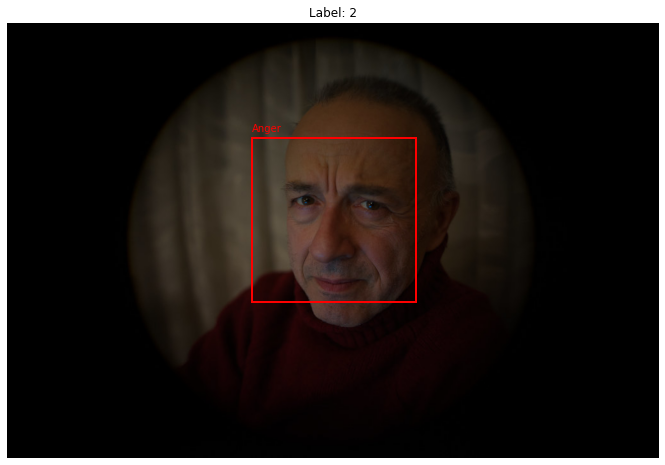

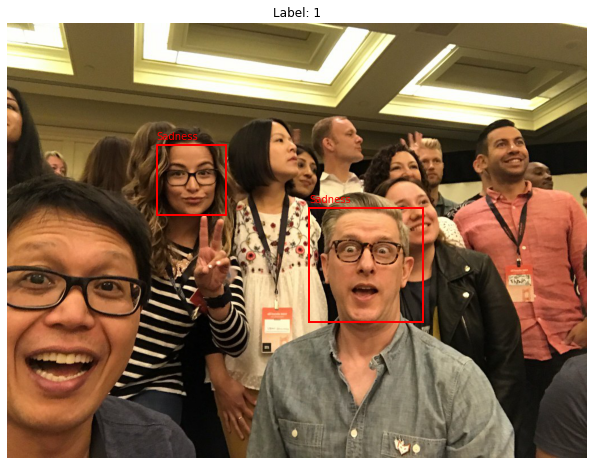

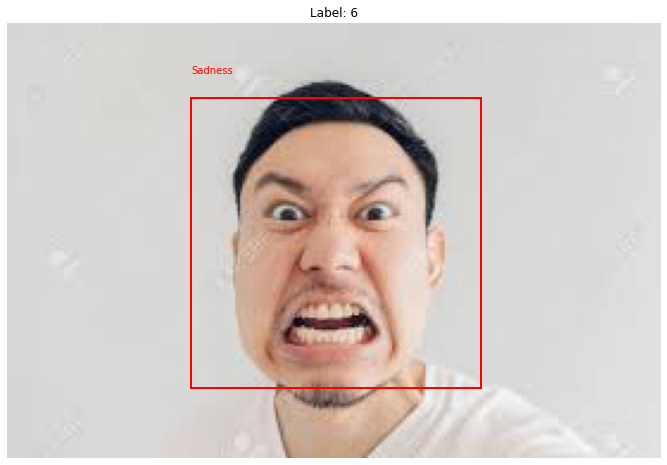

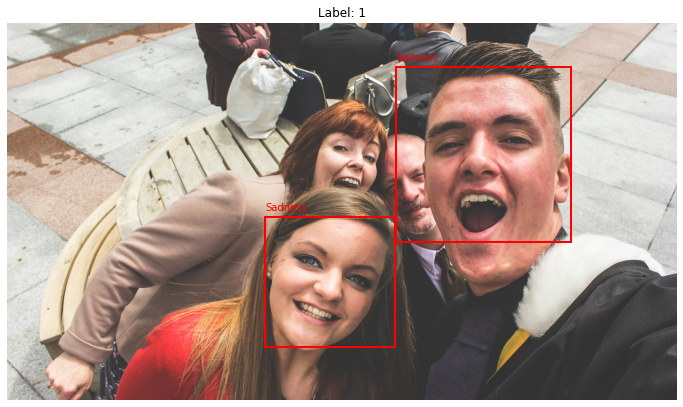

In [ ]:
EmotionRecognition("Personal_Dataset","SS")